In [68]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
import datetime as dt
from datetime import date
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [69]:
cars = pd.read_csv('Cars93.csv')

In [70]:
#cars.rename(columns={'Unnamed: 0':'Indx'}, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93 entries, 0 to 92
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          93 non-null     int64  
 1   Manufacturer        93 non-null     object 
 2   Model               93 non-null     object 
 3   Type                93 non-null     object 
 4   Min.Price           93 non-null     float64
 5   Price               93 non-null     float64
 6   Max.Price           93 non-null     float64
 7   MPG.city            93 non-null     int64  
 8   MPG.highway         93 non-null     int64  
 9   AirBags             93 non-null     object 
 10  DriveTrain          93 non-null     object 
 11  Cylinders           93 non-null     object 
 12  EngineSize          93 non-null     float64
 13  Horsepower          93 non-null     int64  
 14  RPM                 93 non-null     int64  
 15  Rev.per.mile        93 non-null     int64  
 16  Man.trans.

In [71]:
cars.dropna(subset=['Luggage.room','Rear.seat.room'], axis=0, inplace = True)

In [72]:
cars.head()

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [73]:
cars.drop(columns=['Unnamed: 0'], axis=1, inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        82 non-null     object 
 1   Model               82 non-null     object 
 2   Type                82 non-null     object 
 3   Min.Price           82 non-null     float64
 4   Price               82 non-null     float64
 5   Max.Price           82 non-null     float64
 6   MPG.city            82 non-null     int64  
 7   MPG.highway         82 non-null     int64  
 8   AirBags             82 non-null     object 
 9   DriveTrain          82 non-null     object 
 10  Cylinders           82 non-null     object 
 11  EngineSize          82 non-null     float64
 12  Horsepower          82 non-null     int64  
 13  RPM                 82 non-null     int64  
 14  Rev.per.mile        82 non-null     int64  
 15  Man.trans.avail     82 non-null     object 
 16  Fuel.tank.

In [74]:
cars['Cylinders'] = cars['Cylinders'].astype(float)

In [75]:
cars['Cylinders'].unique()

array([4., 6., 8., 3., 5.])

In [76]:
y = cars.copy()
y= y[['MPG.highway']]

In [77]:
x = cars.copy()
x.drop(columns=['MPG.highway'],axis=1, inplace=True)

In [78]:
x.columns

Index(['Manufacturer', 'Model', 'Type', 'Min.Price', 'Price', 'Max.Price',
       'MPG.city', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Rev.per.mile', 'Man.trans.avail',
       'Fuel.tank.capacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turn.circle', 'Rear.seat.room', 'Luggage.room', 'Weight', 'Origin',
       'Make'],
      dtype='object')

In [79]:
x = pd.get_dummies(x, columns=['Manufacturer','Model','Type','AirBags','DriveTrain','Man.trans.avail','Origin','Make'], drop_first=True)

In [80]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 92
Columns: 221 entries, Min.Price to Make_Volvo 850
dtypes: float64(8), int64(10), uint8(203)
memory usage: 28.4 KB


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)

In [95]:
reg = LinearRegression().fit(x_train,y_train)

In [96]:
x_predict = [x.loc[5]]
x_predict2 = [x.loc[7]]

pred1 = reg.predict(x_predict)
pred2 = reg.predict(x_predict2)

In [92]:
pred2
#ax = cars.plot(title='Weight of Vehicles vs MPG', kind='scatter', x='Weight',y='MPG.highway')
#ax.plot(x, reg.coef_ * x, color='r')

array([[25.]])

In [94]:
reg.score(x, y, sample_weight=None)

0.9682384135821539

In [ ]:
#add prediction to dataframe and scatterplot it!!
#to print out coefficients add the things

In [97]:
test_predictions = reg.predict(x_test)

In [98]:
test_predictions

array([[29.30198027],
       [25.8947586 ],
       [27.56307201],
       [24.19905827],
       [27.04985934],
       [23.76958129],
       [31.53508784],
       [27.63885421],
       [26.68998159],
       [24.68037285],
       [35.59261755],
       [30.79914092],
       [27.74702704],
       [29.61729396],
       [48.06544529],
       [32.32537075],
       [33.8119522 ],
       [35.90589703],
       [34.7283024 ],
       [32.93354227],
       [27.81185103]])

In [99]:
x_test['predictions'] = test_predictions

C:\Users\Daniel\AppData\Local\Temp/ipykernel_20792/2661249642.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_test['predictions'] = test_predictions


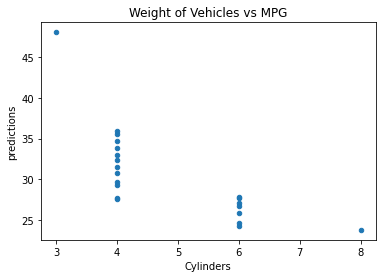

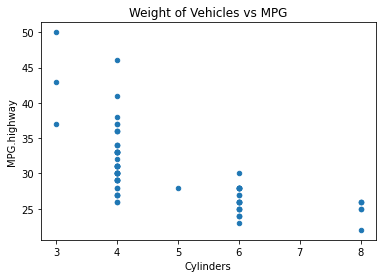

In [101]:
ax = x_test.plot(title='Weight of Vehicles vs MPG', kind='scatter', x='Cylinders',y='predictions')
ax2 = cars.plot(title='Weight of Vehicles vs MPG', kind='scatter', x='Cylinders',y='MPG.highway')